In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR

In [ ]:
df_final = pd.read_csv("Gold_Predict.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df_final.head(4)

,G_Open,G_High,G_Low,G_Close,G_Adj Close,G_Vol.,US_Price,US_Open,US_High,US_Low,US_Vol.,US_Change %
Date,,,,,,,,,,,,
2022-02-28,249.149994,249.990005,246.899994,247.940002,247.940002,62357,96.858,97.112,97.395,96.605,0,0.25%
2022-02-25,249.500000,249.809998,247.199997,247.210007,247.210007,69116,96.619,97.040,97.225,96.510,33080,-0.51%
2022-02-24,246.080002,253.139999,245.789993,252.000000,252.000000,55579,97.118,96.255,97.735,96.255,53310,0.97%
2022-02-23,245.550003,245.550003,244.050003,244.190002,244.190002,59865,96.188,96.005,96.240,95.835,19870,0.18%


In [ ]:
df_final.shape

(310, 12)

In [ ]:
df_final.describe()

,G_Open,G_High,G_Low,G_Close,G_Adj Close,G_Vol.,US_Price,US_Open,US_High,US_Low,US_Vol.
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,226.005838,226.655129,225.374129,226.087161,226.087161,24692.864516,92.877332,92.861461,93.106897,92.647923,22709.909677
std,8.965770,9.045234,8.865211,8.936698,8.936698,15946.035528,2.188008,2.186966,2.192795,2.177072,9419.169014
min,205.580002,205.750000,204.559998,205.309998,205.309998,6732.000000,89.409000,89.330000,89.795000,89.165000,0.000000
25%,220.904995,221.622505,220.237499,221.200005,221.200005,15164.000000,90.921000,90.871250,91.116250,90.662500,17120.000000
50%,226.870002,227.605004,226.264999,226.985001,226.985001,20717.500000,92.594500,92.582500,92.790000,92.365000,21130.000000
75%,231.972496,232.847504,231.500003,232.090004,232.090004,29675.250000,94.711000,94.492500,94.836250,94.221250,27572.500000
max,249.500000,253.139999,247.199997,252.000000,252.000000,143548.000000,97.266000,97.220000,97.735000,97.050000,65401.000000


In [ ]:
df_final.isnull().values.any()

False

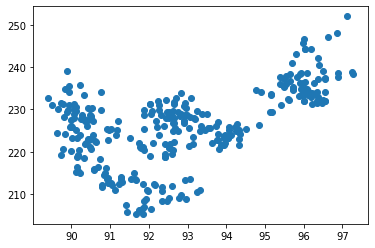

In [ ]:
GLD_adj_close = df_final['G_Adj Close']
usdi_price      = df_final['US_Price']
plt.scatter(x=usdi_price, y=GLD_adj_close)

Mean= 226.08716120967728
Standard Deviation= 8.936697807656316


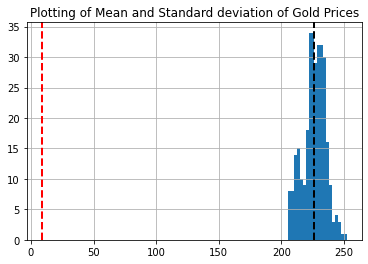

In [ ]:
mean=df_final['G_Adj Close'].mean()
std=df_final['G_Adj Close'].std()
print('Mean=',mean)
print('Standard Deviation=',std)

df_final['G_Adj Close'].hist(bins=20)

plt.axvline(mean, color='black',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean and Standard deviation of Gold Prices")
plt.show()

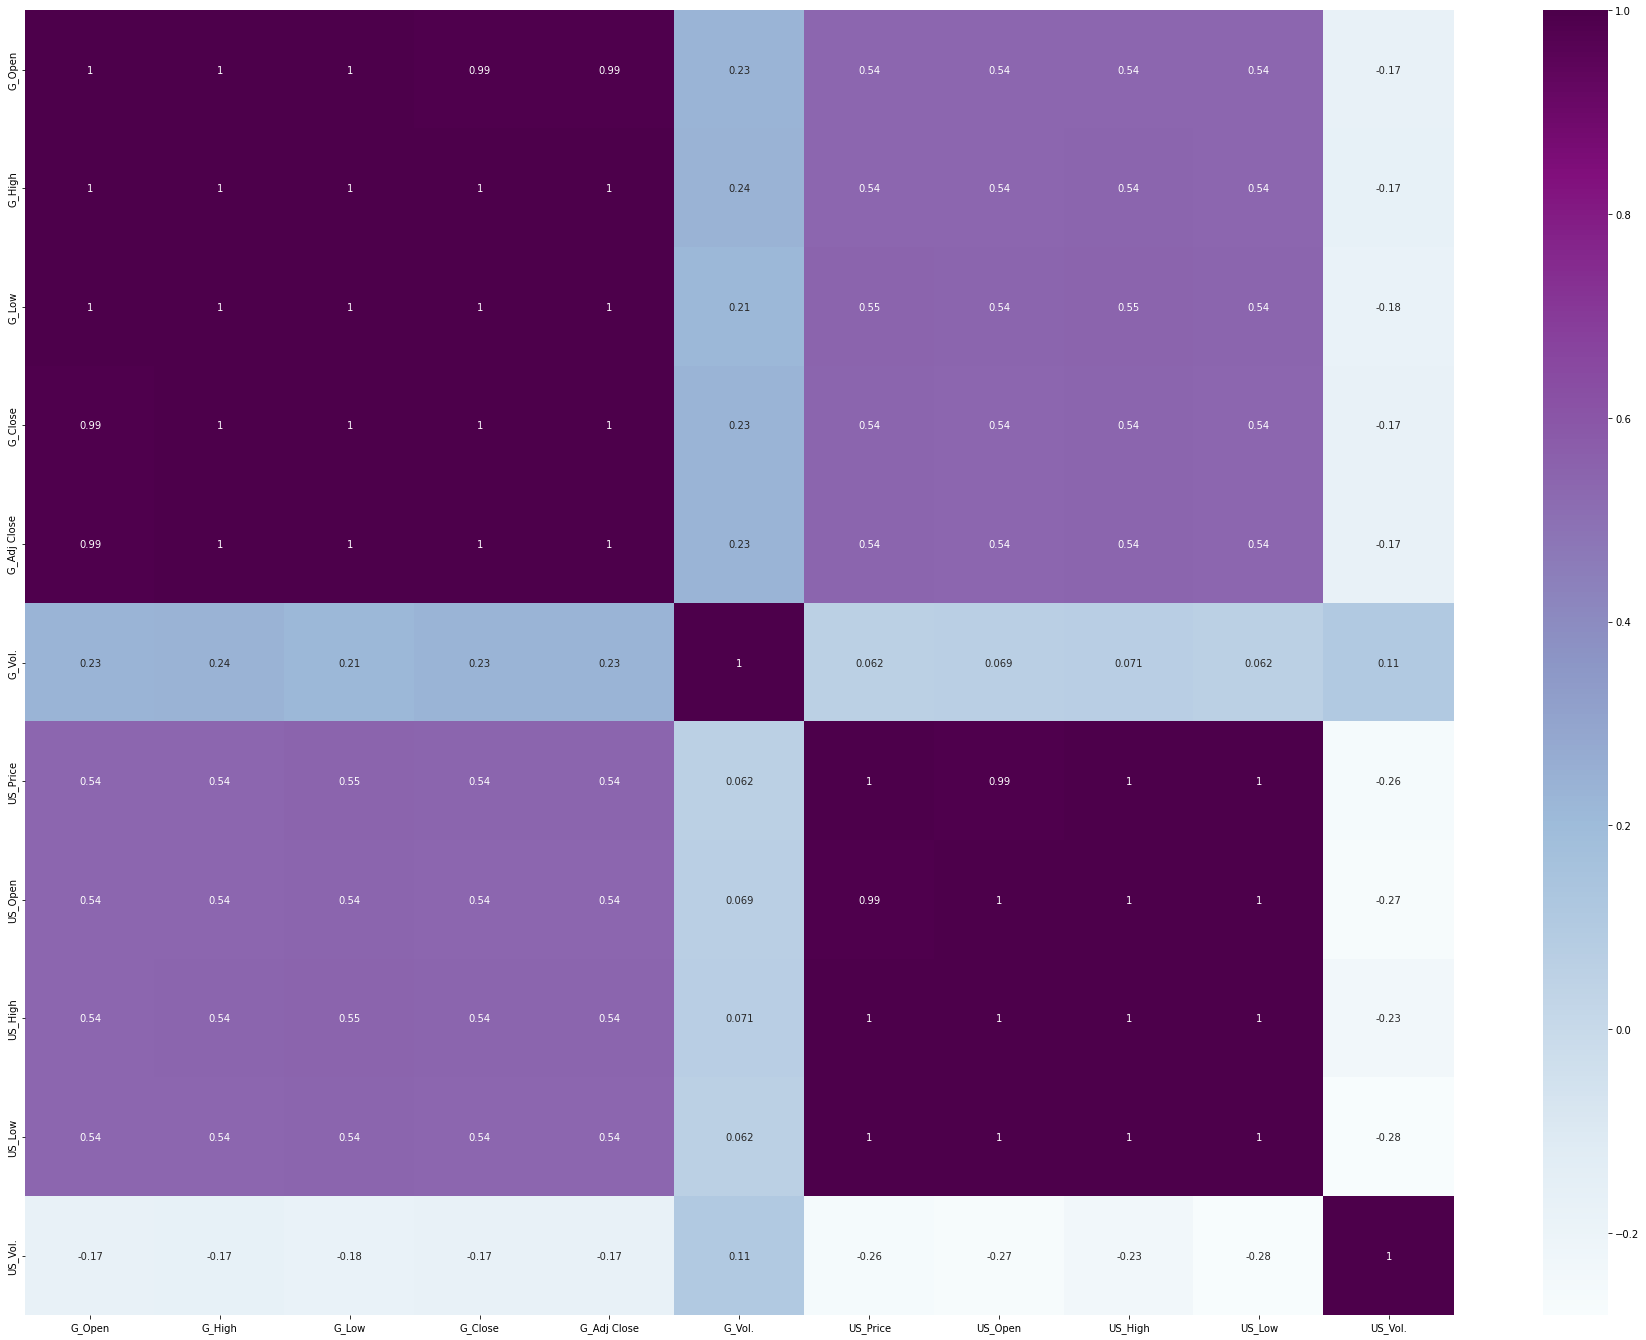

In [ ]:
plt.figure(figsize=(32,24))
sns.heatmap(df_final.corr(), annot=True,cmap="BuPu") 

In [ ]:
feature_columns = ['G_Open', 'G_High', 'G_Low', 'G_Vol.' , 'US_Price', 'US_Open', 'US_High','US_Low', 'US_Vol.']

In [ ]:
feature_columns

['G_Open',
 'G_High',
 'G_Low',
 'G_Vol.',
 'US_Price',
 'US_Open',
 'US_High',
 'US_Low',
 'US_Vol.']

In [ ]:
test = df_final
target_adj_close = pd.DataFrame(test['G_Adj Close'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,G_Open,G_High,G_Low,G_Vol.,US_Price,US_Open,US_High,US_Low,US_Vol.
Date,,,,,,,,,
2022-02-28,0.992031,0.933530,0.992964,0.406568,0.948072,0.986312,0.957179,0.943564,0.000000
2022-02-25,1.000000,0.929732,1.000000,0.455970,0.917653,0.977186,0.935768,0.931516,0.505803
2022-02-24,0.922131,1.000000,0.966932,0.357027,0.981163,0.877693,1.000000,0.899176,0.815125
2022-02-23,0.910064,0.839840,0.926126,0.388354,0.862798,0.846008,0.811713,0.845910,0.303818
2022-02-22,0.965847,0.905043,0.984991,0.323719,0.840270,0.860583,0.812972,0.845276,0.307182


In [ ]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

,G_Open,G_High,G_Low,G_Vol.,US_Price,US_Open,US_High,US_Low,US_Vol.
Date,,,,,,,,,
2022-02-28,0.992031,0.933530,0.992964,0.406568,0.948072,0.986312,0.957179,0.943564,0.000000
2022-02-25,1.000000,0.929732,1.000000,0.455970,0.917653,0.977186,0.935768,0.931516,0.505803
2022-02-24,0.922131,1.000000,0.966932,0.357027,0.981163,0.877693,1.000000,0.899176,0.815125
2022-02-23,0.910064,0.839840,0.926126,0.388354,0.862798,0.846008,0.811713,0.845910,0.303818
2022-02-22,0.965847,0.905043,0.984991,0.323719,0.840270,0.860583,0.812972,0.845276,0.307182


Shape of features :  (310, 9)
Shape of target :  (310, 1)


In [ ]:
# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,G_Open,G_High,G_Low,G_Vol.,US_Price,US_Open,US_High,US_Low,US_Vol.
Date,,,,,,,,,
2020-12-14,0.500228,0.474362,0.538227,0.131140,0.107038,0.108365,0.064861,0.115409,0.165594
2020-12-11,0.515027,0.482169,0.528143,0.262901,0.118493,0.152725,0.098866,0.112238,0.421247
2020-12-10,0.586293,0.542308,0.599906,0.187259,0.144712,0.097592,0.103904,0.099556,0.334399
2020-12-09,0.694672,0.644018,0.676829,0.192931,0.068729,0.090621,0.145466,0.096386,0.600144
2020-12-08,0.666894,0.635577,0.708959,0.138054,0.069238,0.059569,0.032746,0.074826,0.274155


,G_Adj Close
Date,
2020-12-14,227.630005
2020-12-11,230.270004
2020-12-10,234.169998
2020-12-09,235.550003
2020-12-08,231.559998



 -----After process------ 

Shape of features :  (220, 9)
Shape of target :  (220, 1)


,G_Adj Close
Date,
2021-04-26,215.580002
2021-04-23,215.850006
2021-04-22,216.139999
2021-04-21,212.190002
2021-04-20,214.600006


In [ ]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
X_train.shape , X_test.shape,y_train.shape, y_test.shape

((200, 9), (20, 9), (200,), (20,))

In [ ]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
  
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  3.675336939042732
R2 score:  0.8413397475797809


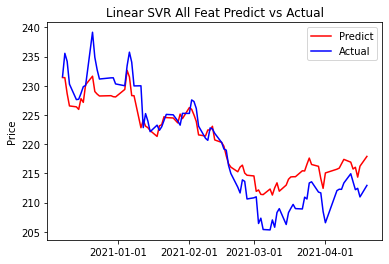

In [ ]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train)
validate_result(linear_svr_clf_feat,'Linear SVR All Feat')

RMSE:  6.840339316146943
R2 score:  0.45042228645461657


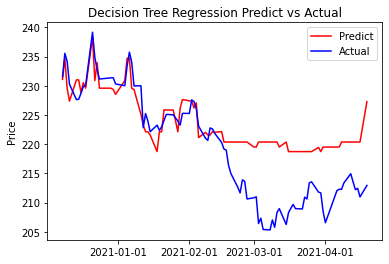

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')
solution_models['DecisionTree'] = dt



RMSE:  7.09482998855269
R2 score:  0.40876816868071264


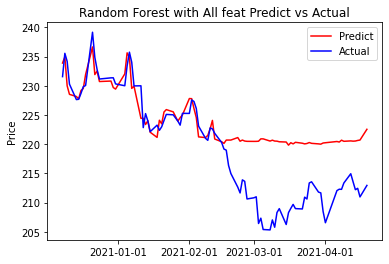

In [ ]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)
validate_result(random_forest_clf_feat,'Random Forest with All feat')
solution_models['Random Forest'] = random_forest_clf_feat

RMSE:  1.869008087777286
R2 score:  0.9589705038927413


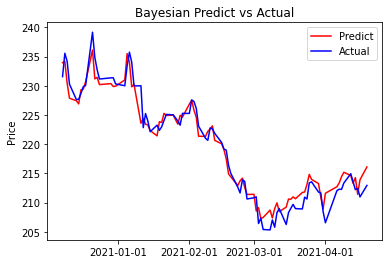

In [ ]:
from sklearn import linear_model
bay = linear_model.BayesianRidge()
bay_feat = bay.fit(X_train,y_train)
validate_result(bay_feat,'Bayesian')
solution_models['Bay All Feat'] = bay_feat

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


RMSE:  8.563188682032372
R2 score:  0.1387190356719008


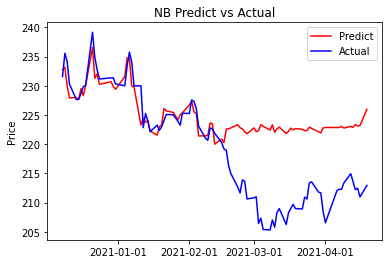

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train,y_train)
validate_result(GB_feat,'NB')
solution_models['GB All Feat'] = GB_feat

RMSE:  2.0799048430076867
R2 score:  0.9491886476061563


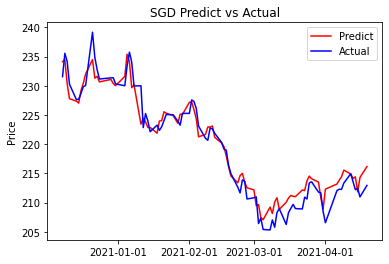

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_feat = sgd.fit(X_train,y_train)
validate_result(sgd_feat,'SGD')
solution_models['SGD All Feat'] = sgd_feat

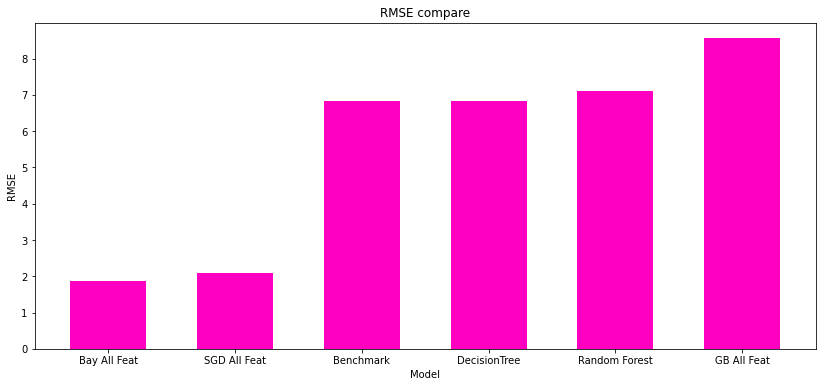

In [ ]:
RMSE_scores = {}
def model_review(models):

    #plot benchmark model
    benchmark_predicted = benchmark_dt.predict(validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_predicted))
    RMSE_scores['Benchmark'] = benchmark_RSME_score

    #plot solution model
    for name, model in models.items():
        predicted = model.predict(validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
        RMSE_scores[name] = RSME_score

model_review(solution_models)
model_names = []
model_values = []
for name, value in RMSE_scores.items():
    model_names.append(name)
    model_values.append(value)

model_values = np.array(model_values)
model_names = np.array(model_names)

indices = np.argsort(model_values)
columns = model_names[indices[:6]]
values = model_values[indices][:6]

fig = plt.figure(figsize = (14,6))
plt.bar(np.arange(6), values ,width = 0.6, align="center", color = '#ff00c1')
plt.xticks(np.arange(6), columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare')   
plt.show()